In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
import sys
print(sys.path)
sys.path.remove('c:\\users\\star5\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\\localcache\\local-packages\\python312\\site-packages')

['C:\\Users\\star5\\EE101', '', 'C:\\python\\DLLs', 'C:\\python\\Lib', 'C:\\python', 'C:\\Users\\star5\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\python\\Lib\\site-packages', 'C:\\python\\Lib\\site-packages\\vboxapi-1.0-py3.11.egg', 'C:\\python\\Lib\\site-packages\\win32', 'C:\\python\\Lib\\site-packages\\win32\\lib', 'C:\\python\\Lib\\site-packages\\Pythonwin']


ValueError: list.remove(x): x not in list

In [39]:
#각 종류의 data를 읽음 이름은 자료_data로 함
covid_data=pd.read_csv(filepath_or_buffer=r'WHO-COVID-19-global-data.csv')
capital_data=pd.read_csv(filepath_or_buffer=r'country-capital-lat-long-population.csv')
population_data=pd.read_csv(filepath_or_buffer=r'country-population.csv')
area_data=pd.read_csv(filepath_or_buffer=r'list_of_countries_by_area.csv')
#covid_data에서 Nan을 0으로 바꾼후 음수인 data가 있는 columns 제거
covid_data=covid_data.fillna(0)
covid_data=covid_data[covid_data.select_dtypes(include=['number']).ge(0).all(axis=1)]


In [40]:
#오류 확인을 위해 각 data head 확인
print(covid_data.head(5))
print(area_data.head(5))
print(population_data.head(5))
print(capital_data.head(5))

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO        0.0   
1    2020-01-12           AF  Afghanistan       EMRO        0.0   
2    2020-01-19           AF  Afghanistan       EMRO        0.0   
3    2020-01-26           AF  Afghanistan       EMRO        0.0   
4    2020-02-02           AF  Afghanistan       EMRO        0.0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         0.0                  0  
1                 0         0.0                  0  
2                 0         0.0                  0  
3                 0         0.0                  0  
4                 0         0.0                  0  
   S.No.      Country / Dependency        Total in km (mi)  \
0      1        Russian Federation  17,098,246 (6,601,670)   
1      2                    Canada   9,984,670 (3,855,100)   
2      3                     China   9,596,961 (3,705,407)   
3      4  United States of Amer

In [41]:
#class Country 정의
class Country:
    '''attribute로 name, country_code, WHO_region(by WHO-COVID-19-global-data.csv)를 부여하기 위해
    우선 country를 함께 입력받아 name으로 할당한 후 country 입력 값과 각각의 표에서 country에 해당하는 부분이 입력받은 country와 같은 dataframe을 구성한다
    이후 필요한 부분에 접근한 다음 list로 변환 후 [0]을 통해 data로 변환한다. 필요한 경우 조작을 첨한다.
    '''
    def __init__(self, country):
        self.name=country
        countrysdataframe=covid_data[(covid_data['Country']==country)]
        self.WHO_region=list(countrysdataframe['WHO_region'])[0]
        self.Country_code=list(population_data[(population_data['Country Name']==country)]['Country Code'])[0]
        self.capital=list(capital_data[(capital_data['Country']==country)]['Capital City'])[0]
        areadataframe=area_data[(area_data['Country / Dependency']==country)]
        self.land_in_km=list(areadataframe['Land in km (mi)'])[0].split('(')[0].strip().replace(',', '')
        self.water_in_km=list(areadataframe['Water in km (mi)'])[0].split('(')[0].strip().replace(',', '')
        self.population=list(population_data[(population_data['Country Name']==country)]['1960'])[0]
    def info(self):
        '''
        각각의 attribute를 이름과 함께 출력한다.
        '''
        print('name:',self.name)
        print('WHO-region:',self.WHO_region)
        print('countrycode:',self.Country_code)
        print('capital:',self.capital)
        print('land area:',self.land_in_km)
        print('water area:',self.water_in_km)
        print('population:',self.population)

    def population_density(self):
        #인구 밀도를 기존 값에 float를 이용하여 계산, population_den에 할당, 반환한다.
        self.population_den = float(self.population)/(float(self.land_in_km)+float(self.water_in_km))
        return float(self.population)/(float(self.land_in_km)+float(self.water_in_km))
        
    def update_population(self):
        '''Country name이 이름과 같은 data로 dataframe 생성
        이후 1960년 데이터를 선택한 뒤 차례로 다음 data를 이전 데이터로 나눈 값을 my_list에 추가한다.
        만약 이후 자료가 없다면 마지막 자료를 p에 할당한다.
        그후 my_list 값을 평균 내어 p에 곱한 값을 self.population, 함수에 반환한다''' 
        populationdataframe=population_data[(population_data['Country Name']==self.name)]
        my_list=[]
        k=4
        p=0
        while True:
            k+=1
            if pd.isna(populationdataframe.iloc[0,k]):
                p= populationdataframe.iloc[0,k-1]
                break
            else:
                t=populationdataframe.iloc[0,k]/populationdataframe.iloc[0,k-1]
                my_list.append(t)
        self.population=p*sum(my_list)/len(my_list)
        return p*sum(my_list)/len(my_list)
    @staticmethod
    def compare(lis):
        '''static method로 생성 list를 입력받는다. 이후 list 내 값을 k로 하여 k.population_den을 p로,
        그리고 {k:k.population}으로 하는 dictionary를 생성한다. 없는 경우 넘긴다.
        그후 mylist를 item 값으로 정렬한다. 그리고 10개 혹은 list 갯수 중 적은 값만큼 
        dictionary에서의 key를 출력한다.(sort 과정에서 list를 element로 하는 list가 됨)
        '''
        #출력하려 했으나 없는 값들이 존재, 이 경우 넘김
        mylist={}
        for k in lis:
            try:
                k.population_density()
                p=k.population_den
                mylist[k.name]=p
            except:
                continue
        mylist=sorted(mylist.items(),key=lambda x: x[1], reverse=True)
        for i in range(min(10, len(mylist))):
            print(mylist[i][0])
                
#테스트            
# country1=Country('Republic of Korea')
# country1.info()
# country1.population_density()
# print(country1.update_population())
'''WHO_region이 EURO인 나라를 선택해 country 열을 list로 만든다.
그후 population_density로 population_den attribution을 생성하고, mylist에 Country class의 i를 더한다.
그후 mylist에 Country의 compare method를 사용한다.
'''
selected_data=covid_data[(covid_data['WHO_region']=='EURO')]['Country']
onlist=list(set(selected_data))
mylist=[]
for i in onlist:
    try:
        p=Country(i)
        p.population_density()
        mylist.append(p)
    except:
        continue
Country.compare(mylist)

Monaco
Malta
Belgium
Netherlands (Kingdom of the)
San Marino
United Kingdom of Great Britain and Northern Ireland
Germany
Italy
Switzerland
Luxembourg


In [42]:
'''WHO_region이 EURO인 나라를 선택해 country 열을 list로 만든다.
우선 update population으로 population attribution을 바꾼다.
그후 population_density로 population_den attribution을 생성하고, mylist에 Country class의 i를 더한다.
그후 mylist에 Country의 compare method를 사용한다. '''
mylist=[]
for i in onlist:
    try:
        p=Country(i)
        p.update_population()
        p.population_density()
        mylist.append(p)
    except:
        continue
Country.compare(mylist)

Monaco
Malta
San Marino
Israel
Netherlands (Kingdom of the)
Belgium
United Kingdom of Great Britain and Northern Ireland
Luxembourg
Germany
Switzerland


In [43]:
class Covid(Country):
    '''
    init은 super로 계승한 후 self.cumulative_cases:Cumulative_cases 마지막 값
    self.average_weeklycases:Cumulative_cases를 날짜로 나눈 값
    self.cumulative_deaths:Cumulative_deaths의 마지막 값
    self.average_deaths:Cumulative_deaths를 날짜로 나눈 값
    '''
    def __init__(self, country):
        super().__init__(country)
        cumul=covid_data[covid_data['Country']==country]['Cumulative_cases']
        self.cumulative_cases=list(cumul)[-1]
        self.average_weeklycases=list(cumul)[-1]/215
        cumul=covid_data[covid_data['Country']==country]['Cumulative_deaths']
        self.cumulative_deaths=list(cumul)[-1]
        self.average_deaths=list(cumul)[-1]/215

    def info(self):
        '''info도 super로 계승한 후 추가된 attribution을 더 출력한다.
        '''
        super().info()
        print('cumulative_cases:', self.cumulative_cases)
        print('cumulative deaths:',self.cumulative_deaths)
        print('average_weeklycases:',self.average_weeklycases)
        print('weekly average deaths:',self.average_deaths)

    def mortality_rates(self):
        #mortality_rate를 계산해 attribution에 추가하고 반환 값은 감염 수 중 사망 수 * 100
        self.mortality_rate=self.cumulative_deaths/self.cumulative_cases * 100 
        return self.cumulative_deaths/self.cumulative_cases * 100
    def infection_rates(self):
        #infection_rate를 계산해 attribution에 추가하고 반환 인구 중 감염자 수 * 100
        self.infection_rate=self.cumulative_cases/self.population * 100
        return self.cumulative_cases/self.population * 100
    def composite_risk_index(self):
        #composite_risk_index를 계산 attribution에 추가, 치명률에 0.4의 비중, 감염 가능성에 0.6의 비중을 두었다.
        #예상되는 식은 두번째 값을 population으로 나눈 것일 거임 ppt대로 행함
        self.update_population()
        self.composite_risk= 0.4* self.mortality_rate + 0.6 * (self.population - self.cumulative_cases)* self.infection_rate
        return 0.4* self.mortality_rate + 0.6 * (self.population - self.cumulative_cases) * self.infection_rate

    @staticmethod
    def rank_by_composite(d, lis):
        '''staticmethod로 list 중 capital의 첫 번째 글자가 d인 mylist를 만들어 mylist에 대해 composite_risk를 data, country를 key로 
        하는 dictionary를 구성한다 이후 dictionary를 data로 오름차순으로 정렬해 각각을 list로 만든 후 다시 dictionary로 되돌려 반환한다.
        '''
        mylist=[]
        for i in lis:
            if list(i.capital)[0]==d:
                mylist.append(i.name)

        newlist={}
        for i in mylist:
            try:
                p=Covid(i)
                p.infection_rates()
                p.mortality_rates()
                p.composite_risk_index()
                newlist[i]=p.composite_risk
            except:
                continue
        newlist=sorted(newlist.items(),key=lambda x: x[1], 
        reverse=False)
        mylist={}
        for i in newlist:
            print(i[0],i[1])
            mylist[i[0]]=i[1]

        
    def calculate_vaccine_effect(self, deviation):
        '''
        vaccine effect를 입력받은 deviation을 이용해 구한다.
        이후 attribution에 할당하고, 반환한다.
        '''
        self.estimated_new_cases=min(0.5* self.average_weeklycases+deviation, self.average_weeklycases)
        self.estimated_new_deaths=min(0.4*self.average_deaths+ deviation, self.average_deaths)

        self.vaccine_effect=self.average_weeklycases/self.estimated_new_cases + self.average_deaths/self.estimated_new_deaths
        return self.average_weeklycases/self.estimated_new_cases + self.average_deaths/self.estimated_new_deaths


In [44]:
#test
#Covid1=Covid('Republic of Korea')
# Covid1.info()
# Covid1.mortality_rates()
# Covid1.infection_rates()
# Covid1.composite_risk_index()
# print(Covid1.mortality_rate)
# print(Covid1.infection_rate)
# print(Covid1.composite_risk)

In [45]:
'''
WHO_region이 EURO인 DataFrame에 대해 country를 모은 다음 set를 부여해 중복된 값을 없애고 다시 list 부여
Covid를 실행할 수 없는 경우 넘기고 실행할 수 있는 경우 인구 밀도 등을 계산하여 Covid class의 값을 mylist에 추가한다.
이후 staticmethod rank_by_composite를 통해 수도가 B로 시작하는 나라들을 정렬해 출력한다.
'''

selected_data=covid_data[(covid_data['WHO_region']=='EURO')]['Country']
onlist=list(set(selected_data))
mylist=[]
for i in onlist:
    try:
        p=Covid(i)
        p.update_population()
        p.population_density()
        mylist.append(p)
    except:
        continue
Covid.rank_by_composite('B', mylist)

Serbia 95754448.21744941
Hungary 99277139.8089368
Azerbaijan 121729324.25988415
Romania 178418270.06927153
Belgium 218905183.815979
Switzerland 220340852.54842445
Germany 1442742397.5744114


In [46]:
'''selected_data에 WHO_region이 AFRO인 dataframe을 생성한다. 
이후 onlist에 set를 통해 반복되는 값을 없애고 list를 사용한 뒤 onlist 값들에 대해
Covid class를 부여하고 update_population한 뒤 calculate_vaccine_effect 한 값을 data, 
국가 이름을 key로 하는 dictionary를 구성한다.
'''
selected_data = covid_data[(covid_data['WHO_region']=='AFRO')]['Country']
onlist=list(set(selected_data))
mylist={}
for i in onlist:
    try:
        p=Covid(i)
        p.update_population()
        k=p.calculate_vaccine_effect(10)
        mylist[i]=p.vaccine_effect

    except:
        continue

#이후 dictionary를 정렬하고 첫번째 값을 출력한다.
mylist=sorted(mylist.items(),key=lambda x: x[1], 
        reverse=False)
print(mylist[0][0])

Chad


In [73]:
'''
covid data의 모든 나라를 가져온 후 육토가 10000000가 넘는다면 calculate_vaccine_effect(20)을 한 후 
mylist에 Covid class의 나라를 추가한다
'''
selected_data= list(set(covid_data['Country']))
mylist=[]
for i in selected_data:
    #육토가 10000000이 넘는 나라는 러시아 밖에 없음 
    try:
        k=Covid(i)
        if int(k.land_in_km)>10000000:
            k.calculate_vaccine_effect(20)
            mylist.append(k)

    except:
        continue
'''
이후 mylist에 대해 이름을 key로, vaccine_effect를 data로 하는 dictionary를 만들고
정렬한다
그후 newlist의 첫번째 값을 출력한다.
'''
newlist={}
for i in mylist:
    newlist[i.name]= i.vaccine_effect
newlist=sorted(newlist.items(),key=lambda x: x[1], reverse=True)
for i in range(min(1, len(newlist))):
    print('which country you find is',newlist[i][0])
    k=Covid(newlist[i][0])
    k.info()


which country you find is Russian Federation
name: Russian Federation
WHO-region: EURO
countrycode: RUS
capital: Moskva (Moscow)
land area: 16378410
water area: 719836
population: 119897000.0
cumulative_cases: 23931163
cumulative deaths: 402097
average_weeklycases: 111307.73488372093
weekly average deaths: 1870.2186046511629


In [48]:
'''age_data를 가져온 후, 필요없는 열을 버린다.
그후 노인들의 수를 알아내기 위해 65세 이상인 자료로
새로운 dataframe을 구성한다.
'''
age_data=pd.read_csv(filepath_or_buffer='age_of_population.csv')
age_data=age_data.iloc[:,4:19]
age_data=age_data[(age_data['Age']=='65 years or over')]
print(age_data.head())
#자료 확인

    REF_AREA Reference area MEASURE     Measure UNIT_MEASURE Unit of measure  \
143      IND          India     POP  Population           PS         Persons   
144      IND          India     POP  Population           PS         Persons   
145      IND          India     POP  Population           PS         Persons   
146      IND          India     POP  Population           PS         Persons   
147      IND          India     POP  Population           PS         Persons   

    SEX    Sex     AGE               Age TIME_HORIZ Time horizon  TIME_PERIOD  \
143  _T  Total  Y_GE65  65 years or over          H   Historical         2010   
144  _T  Total  Y_GE65  65 years or over          H   Historical         2011   
145  _T  Total  Y_GE65  65 years or over          H   Historical         2012   
146  _T  Total  Y_GE65  65 years or over          H   Historical         2013   
147  _T  Total  Y_GE65  65 years or over          H   Historical         2014   

     Time period   OBS_VALUE  
1

표본 수: 49
노인 비중과 치사율의 상관관계 수: -0.3040527603407648


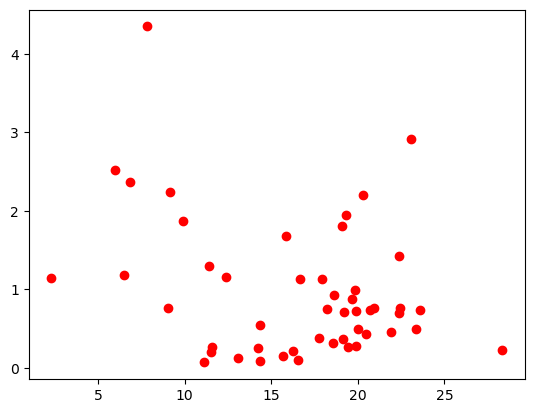

In [62]:
class Old(Covid):
    '''
    class Old를 생성해 Covid의 자료를 계승
    agedataframe은 국가 코드가 같은 자료를 통해 생성
    매년 증가율을 구해 평균을 낸 다음, 마지막 자료에 대해 증가율을 곱해 2024년 자료를 구함
    예상되는 2024년 자료를 self.old_pop에 추가함
    self.old_pop과 self.population을 통해 노인 비율을 구함
    '''
    def __init__(self, country):
        super().__init__(country)
        agedataframe=age_data[age_data['REF_AREA']==self.Country_code]
        mylist=[]
        for i in range(2010,2023):
            k=int(agedataframe[agedataframe['TIME_PERIOD']==i]['OBS_VALUE'].iloc[0])
            mylist.append(k)
        my_list=[]
        for i in range(1,len(mylist)):
            my_list.append(mylist[i]/mylist[i-1])
        self.old_pop=mylist[-1]/(sum(my_list)/len(my_list))
        self.update_population()
        self.old_rate=self.old_pop/self.population*100
            
'''
covid_data로 나라들을 가져온 다음 list로 변환 selected_data에 할당함
노인 비율을 x에 사망율을 y에 추가한 다음 얼마나 선형적 관계를 갖는 지 확인해 보기 위해 
제공된 식을 활용함
'''
selected_data= list(set(covid_data['Country']))
x=[]
y=[]
for i in selected_data:
    try:
        p=Old(i)
        p.update_population()
        x.append(p.old_rate)
        p.mortality_rates()
        y.append(p.mortality_rate)
    except:
        continue

print('표본 수:',len(x))
average_x=sum(x)/len(x)
average_y=sum(y)/len(y)
new_x=[t-average_x for t in x]
new_y=[t-average_y for t in y]
k=0
for i in range(len(new_x)):
    k+=new_x[i]*new_y[i]
t=0
p=0
for i in new_x:
    t+= i**2
for i in new_y:
    p += i**2
print('노인 비중과 치사율의 상관관계 수:',k/((t*p) ** 0.5))
plt.plot(x,y, 'ro')
plt.show()

#음의 상관관계를 보임, 부국, 의료가 잘 갖춰질수록 치사율이 낮기 때문일 것임


회귀 계수: [ 48.54136388 -14.5101952 ]
예측값: [ 35.89434453  45.49874378  34.20767062  37.86666656  47.25553225
  31.90791181   6.28830801  38.28682058  45.3351213   32.06526963
  45.6334024   27.83843796  44.48808094  16.0663493   14.10573308
  44.67883938  31.3503411  -14.55647436  41.31299497  47.0331744
  43.92015183  24.16099441  38.49727858  38.12049535  37.45151081
  32.06292171  31.70493962  43.16466092  46.32054018  21.38824269
  41.41939291  46.75985311  42.29097408  16.63329308  37.75853634
  29.74666827  40.58431555  11.98829417  37.4958857   20.25061833
  43.02096424  47.5629524   37.82005093  44.73306395  22.24745161
  44.83119899  37.46245457  41.9359329   35.01830503]


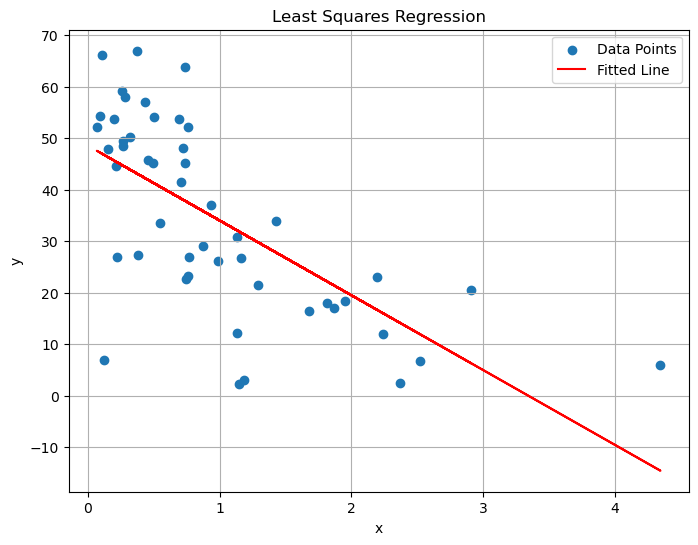

In [71]:
# 입력 데이터와 출력 데이터
x = np.array(x)
y = np.array(y)

# 입력 데이터 행렬 X 생성
X = np.column_stack((np.ones_like(x), x))

# 최소자승법 계산
b = np.linalg.inv(X.T @ X) @ X.T @ y

# 예측값 계산
y_pred = X @ b

print("회귀 계수:", b)
print("예측값:", y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='r', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression')
plt.legend()
plt.grid()
plt.show()

표본 수: 49
노인 비중과 감염율의 상관관계 수: 0.4748794180292585


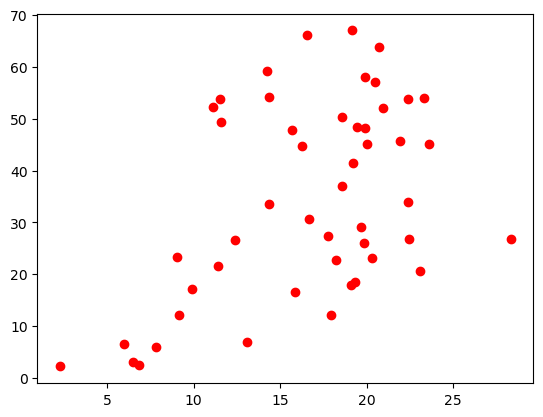

In [65]:
selected_data= list(set(covid_data['Country']))
x=[]
y=[]
for i in selected_data:
    try:
        p=Old(i)
        p.update_population()
        x.append(p.old_rate)
        p.infection_rates()
        y.append(p.infection_rate)
    except:
        continue

print('표본 수:',len(x))
average_x=sum(x)/len(x)
average_y=sum(y)/len(y)
new_x=[t-average_x for t in x]
new_y=[t-average_y for t in y]
k=0
for i in range(len(new_x)):
    k+=new_x[i]*new_y[i]
t=0
p=0
for i in new_x:
    t+= i**2
for i in new_y:
    p += i**2
print('노인 비중과 감염율의 상관관계 수:',k/((t*p) ** 0.5))
plt.plot(x,y, 'ro')
plt.show()

In [66]:
# 입력 데이터와 출력 데이터
x = np.array(x)
y = np.array(y)

# 입력 데이터 행렬 X 생성
X = np.column_stack((np.ones_like(x), x))

# 최소자승법 계산
b = np.linalg.inv(X.T @ X) @ X.T @ y

# 예측값 계산
y_pred = X @ b

print("회귀 계수:", b)
print("예측값:", y_pred)

회귀 계수: [7.88268129 1.60997661]
예측값: [39.53769559 34.05840096 39.86183117 45.87319265 30.97223603 11.56557592
 45.00724908 38.78491472 53.49193523 36.78537226 26.44433962 43.94670183
 39.89748381 22.59927012 18.86369597 39.19839624 18.38646749 20.46625983
 45.45043332 34.50046032 37.79951949 33.44531435 43.90643965 39.94322737
 44.0263952  34.71760216 27.81803769 38.73212589 33.09989441 23.82389024
 40.11470838 28.98338251 40.85962297 40.56041312 37.19813506 26.28076359
 31.01083312 17.48403405 22.45363595 38.96997362 36.44671767 25.79868153
 41.19974319 26.55283202 38.61584114 30.83215002 41.55909869 43.15724315
 37.82704207]


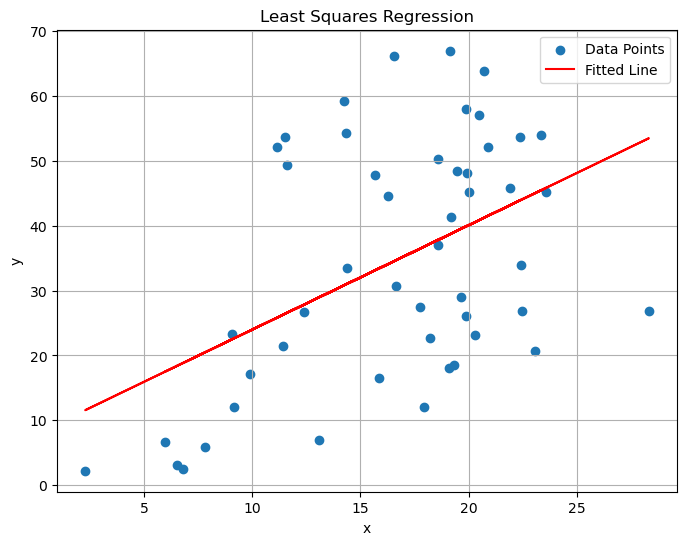

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='r', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression')
plt.legend()
plt.grid()
plt.show()

표본 수: 49
치사율과 감염율의 상관관계 수: -0.6728336474959951


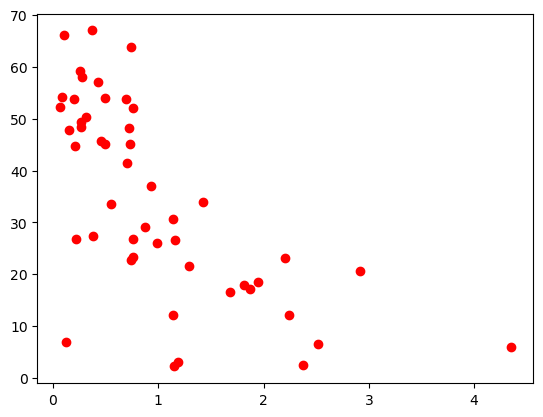

In [68]:
selected_data= list(set(covid_data['Country']))
x=[]
y=[]
for i in selected_data:
    try:
        p=Old(i)
        p.update_population()
        p.mortality_rates()
        x.append(p.mortality_rate)
        p.infection_rates()
        y.append(p.infection_rate)
    except:
        continue

print('표본 수:',len(x))
average_x=sum(x)/len(x)
average_y=sum(y)/len(y)
new_x=[t-average_x for t in x]
new_y=[t-average_y for t in y]
k=0
for i in range(len(new_x)):
    k+=new_x[i]*new_y[i]
t=0
p=0
for i in new_x:
    t+= i**2
for i in new_y:
    p += i**2
print('치사율과 감염율의 상관관계 수:',k/((t*p) ** 0.5))
plt.plot(x,y, 'ro')
plt.show()

회귀 계수: [ 48.54136388 -14.5101952 ]


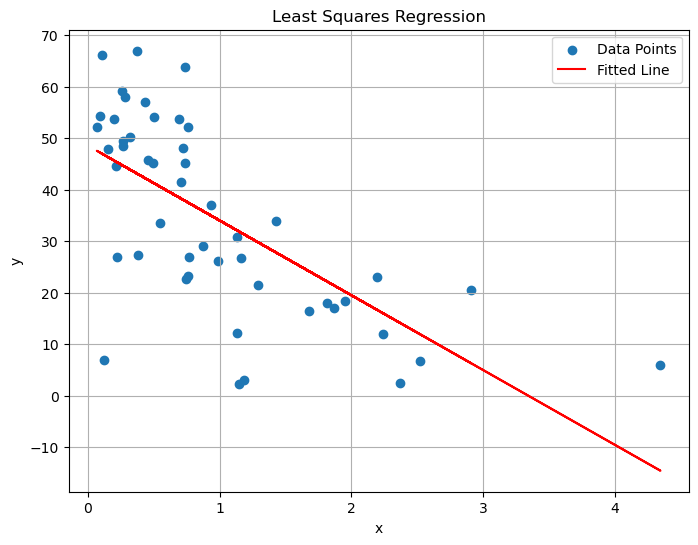

In [70]:
# 입력 데이터와 출력 데이터
x = np.array(x)
y = np.array(y)

# 입력 데이터 행렬 X 생성
X = np.column_stack((np.ones_like(x), x))

# 최소자승법 계산
b = np.linalg.inv(X.T @ X) @ X.T @ y

# 예측값 계산
y_pred = X @ b

print("회귀 계수:", b)
#print("예측값:", y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='r', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression')
plt.legend()
plt.grid()
plt.show()